<a href="https://colab.research.google.com/github/esgiraldop/machine-learning/blob/master/Tarea3/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#To mount drive for workspace. 
from google.colab import drive

#This will prompt for authorization.
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!pip install optunity

     |████████████████████████████████| 4.6MB 2.7MB/s 
  Created wheel for optunity: filename=Optunity-1.1.1-cp36-none-any.whl size=72024 sha256=322e077e4b4fabf77616baaf1813fb92b013f94b0727e9e8aef74d5f16048eb5
  Stored in directory: /root/.cache/pip/wheels/c9/e2/80/d3794524ae0042e147e035e132ec5fac09b8794b4acd94f046
Successfully built optunity


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import optunity
import optunity.metrics
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from mpl_toolkits.mplot3d import Axes3D  # importing the packege for 3D plots
from sklearn import decomposition # importing the pca package

In [0]:
path_to_datos = '/content/drive/My Drive/CursoMLAvanzado/Estudiantes/Luis-Vesga-Erick-Giraldo/Tarea 2/machine.csv';

cpuData = pd.read_csv(path_to_datos, header = None, sep = ',', 
                         names = ['vendorName','modelName','MYCT',
                                  'MMIN','MMAX','CACH','CHMIN','CHMAX','PRP',
                                  'ERP'])
cpuData.info()
cpuData.describe(include='O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vendorName  209 non-null    object
 1   modelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


,vendorName,modelName
count,209,209
unique,30,209
top,ibm,3210
freq,32,1


#Preprocesamiento

In [0]:
#Copying ERP colum into a seperate dataframe
data_ERP =  cpuData[cpuData.columns[-1]]
data_ERP.head()
#Dropping ERP column
cpuData = cpuData.drop(['ERP'], axis=1)

In [0]:
# Encoding of categorical data.
cpuData["vendorName"] = cpuData["vendorName"].astype('category').cat.codes
cpuData["modelName"] = cpuData["modelName"].astype('category').cat.codes

In [0]:
(cpuData[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]).apply(lambda column: (column<= 0).sum())
cpuData['CACH'] = cpuData['CACH']+1
cpuData['CHMIN'] = cpuData['CHMIN']+1
cpuData['CHMAX'] = cpuData['CHMAX'] +1
(cpuData[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]).apply(lambda column: (column<= 0).sum())
cpuDataSt = np.log(cpuData[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']])
cpuDataSt['vendorName'] = cpuData['vendorName']
cpuDataSt['modelName'] = cpuData['modelName']

In [0]:
cpuDataSt.head(10)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,vendorName,modelName
0,4.828314,5.545177,8.699515,5.549076,2.833213,4.859812,5.288267,0,29
1,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.594711,1,62
2,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.393628,1,63
3,3.367296,8.987197,10.373491,3.496508,2.197225,3.496508,5.147494,1,64
4,3.367296,8.987197,9.680344,3.496508,2.197225,2.833213,4.882802,1,65
5,3.258097,8.987197,10.373491,4.174387,2.197225,3.496508,5.762051,1,66
6,3.135494,9.680344,10.373491,4.174387,2.833213,3.496508,5.905362,1,74
7,3.135494,9.680344,10.373491,4.174387,2.833213,3.496508,6.192362,1,75
8,3.135494,9.680344,11.066638,4.174387,2.833213,3.496508,6.455199,1,76
9,3.135494,10.373491,11.066638,4.859812,3.496508,4.174387,7.042286,1,77


 Se cambio la variable MMIN por MYCT para la selección de caracteristicas. Ver trabajo 2.

In [0]:
#  X and Y DataFrames.
X = cpuDataSt.drop(['PRP','MYCT','CHMIN'], axis=1)
Y = cpuDataSt['PRP']

# Modelo Base

In [0]:
# Data split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
# Modelo Base
clf = LinearRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.272762


# Modelos

## LASSO

In [0]:
from sklearn import linear_model
clf = clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train);
predictions = clf.predict(X_test)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.329767


## SVM

In [0]:
clf = SVR(epsilon=0.2)
clf.fit(X_train, y_train);
predictions = clf.predict(X_test)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 1.378673


###Optimización hiperparametos del SVM

Se añadio la optimización de hiperparametros.

In [0]:
from sklearn.svm import SVR
import numpy as np
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'C': 1.5, 'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}

In [0]:
clf = SVR(epsilon=0.5,kernel= 'linear',C = 1.5 ,gamma=1e-07)
clf.fit(X_train, y_train);
predictions = clf.predict(X_test)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))

Mean square Error: 0.267061


## Random Forest Regressor

In [0]:
rf = RandomForestRegressor(random_state = 43)
# Train the model on training data
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)
error = mean_squared_error(y_test, predictions)
print(error)

0.1995388249675856


###Optimización hiperparametos del RF

0.19516510179360075
70


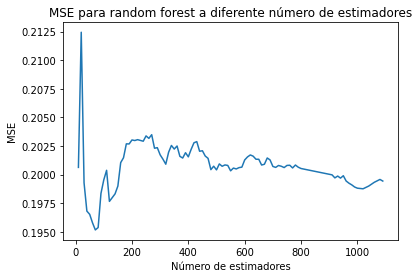

In [0]:
A = []
vect = [10,20,30,40,50,60,70,80,90,100, 110, 120, 140, 150, 160, 170, 180, 190,200, 210, 
                220, 240, 250, 260, 270, 280, 290,  300,310, 320, 330, 340, 350, 360, 370, 380, 
                390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 
                560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700,
                710, 720, 730, 740, 750, 760, 770, 780, 790, 800,910, 920, 930, 940, 950, 960, 970, 980, 990, 1000,
                1020,1040,1060,1080,1090]
for i in vect:
  rf = RandomForestRegressor(n_estimators = i, random_state = 43, min_samples_split = 2)
  # Train the model on training data
  rf.fit(X_train, y_train);
  predictions = rf.predict(X_test)
  errors = mean_squared_error(y_test, predictions)
  A.append(errors)

best_MSE_Id = np.argmin(A)
best_params_enet = vect[best_MSE_Id]
plt.plot(vect, A)
plt.title('MSE para random forest a diferente número de estimadores')
plt.xlabel('Número de estimadores')
plt.ylabel('MSE')
print(A[best_MSE_Id])
print(best_params_enet)

0.20341693768137736
1000


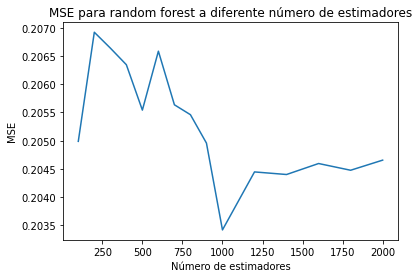

In [0]:
A = []
vect =  [100,200,300,400,500,600,700,800,900,1000,1200, 1400,1600,1800,2000]

for i in vect:
  rf = RandomForestRegressor(n_estimators = i, random_state = 43, min_samples_split = 4)
  # Train the model on training data
  rf.fit(X_train, y_train);
  predictions = rf.predict(X_test)
  errors = mean_squared_error(y_test, predictions)
  A.append(errors)

best_MSE_Id = np.argmin(A)
best_params_enet = vect[best_MSE_Id]
plt.plot(vect, A)
plt.title('MSE para random forest a diferente número de estimadores')
plt.xlabel('Número de estimadores')
plt.ylabel('MSE')
print(A[best_MSE_Id])
print(best_params_enet)

0.2083844344017566
100


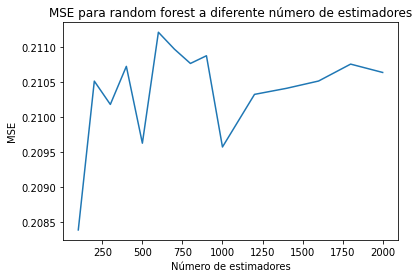

In [0]:
A = []
vect = [100,200,300,400,500,600,700,800,900,1000,1200, 1400,1600,1800,2000]

for i in vect:
  rf = RandomForestRegressor(n_estimators = i, random_state = 43, min_samples_split = 6)
  # Train the model on training data
  rf.fit(X_train, y_train);
  predictions = rf.predict(X_test)
  errors = mean_squared_error(y_test, predictions)
  A.append(errors)
best_MSE_Id = np.argmin(A)
best_params_enet = vect[best_MSE_Id]
plt.plot(vect, A)
plt.title('MSE para random forest a diferente número de estimadores')
plt.xlabel('Número de estimadores')
plt.ylabel('MSE')
print(A[best_MSE_Id])
print(best_params_enet)

0.22175288619405398
200


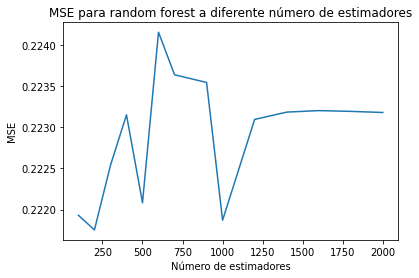

In [0]:
A = []
vect = [100,200,300,400,500,600,700,800,900,1000,1200, 1400,1600,1800,2000]

for i in vect:
  rf = RandomForestRegressor(n_estimators = i, random_state = 43, min_samples_split = 8)
  # Train the model on training data
  rf.fit(X_train, y_train);
  predictions = rf.predict(X_test)
  errors = mean_squared_error(y_test, predictions)
  A.append(errors)

best_MSE_Id = np.argmin(A)
best_params_enet = vect[best_MSE_Id]
plt.plot(vect, A)
plt.title('MSE para random forest a diferente número de estimadores')
plt.xlabel('Número de estimadores')
plt.ylabel('MSE')
print(A[best_MSE_Id])
print(best_params_enet)

In [0]:
rf = RandomForestRegressor(n_estimators = 70, random_state = 43, min_samples_split = 2,bootstrap = False)
# Train the model on training data
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)
errors = mean_squared_error(y_test, predictions)
# Print out the mean square error (mse)
print('Mean square Error:', round(errors, 6))


Mean square Error: 0.232753
